Вход на Юпитерхаб изнутри университетской сети для работы с большими файлами
http://10.7.71.203:8000

# OpenCV для работы с изображениями

In [ ]:
#1
!pip install opencv-python==4.6.0.66

In [ ]:
#2
import cv2
import numpy as np
from IPython.display import Image as ipy_image
from matplotlib import pyplot as plt

In [ ]:
#3
RTSP_URL = "rtsp://???:???@???"
stream = cv2.VideoCapture(RTSP_URL)
ret, frame = stream.read()
stream.release()

In [ ]:
#4
#загрузим из файла, если плохая связь с камерой
frame = cv2.imread('backup.jpg')

In [ ]:
#5
cv2.imwrite('test.jpg', frame)
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(frame)

In [ ]:
#6
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Упражнение: напишите свою функцию преобразования BRG в RGB (не используя циклы)

In [ ]:
#7
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:], [0.2989, 0.5870, 0.1140])

img_gray = rgb2gray(img)    
print(img_gray.shape)
#plt.imshow(gray)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
_ = cv2.imwrite('test_gray.jpg', img_gray)

In [ ]:
#8
ipy_image('test.jpg')

In [ ]:
#9
print(img.shape)
print(img.dtype)

In [ ]:
#10
img[:,:,1] = 0
img[:,:,2] = 0
plt.imshow(img)

# Цветовые модели

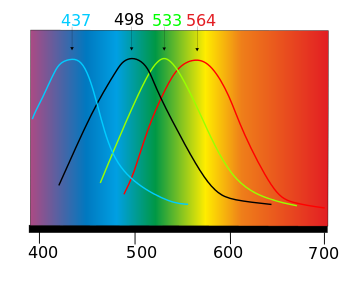 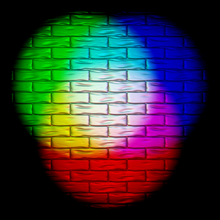 

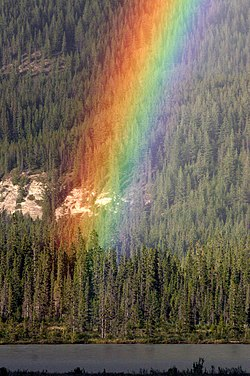 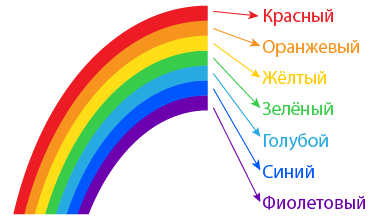 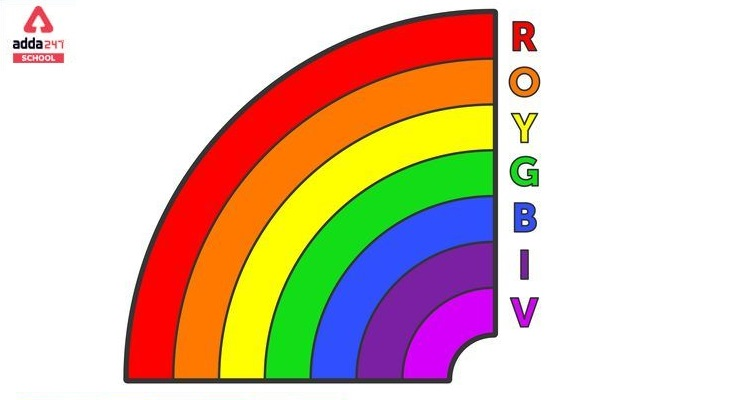

In [ ]:
#11
#Спектр от чисто красного до чисто синего, имитация радуги (зависимости воздействия монохроматического света на фоточувствительные клетки с уменьшением длины волны)
spectrum = np.zeros([256,256*4, 3], dtype=np.uint8) # init the array
# fill the array with rgb values to create the spectrum without the use of loops
spectrum[:,:,0] = np.concatenate(([255]*256, np.linspace(255,0,256), [0]*256, [0]*256), axis=0)
spectrum[:,:,1] = np.concatenate((np.linspace(0,255,256), [255]*256, [255]*256, np.linspace(255,0,256)), axis=0)
spectrum[:,:,2] = np.concatenate(([0]*256, [0]*256,np.linspace(0,255,256),[255]*256), axis=0)
plt.imshow(spectrum)

In [ ]:
#12
#Замыкание назад к красному
roundspectrum = np.zeros([256,256*6, 3], dtype=np.uint8) # init the array
# fill the array with rgb values to create the spectrum without the use of loops
roundspectrum[:,:,0] = np.concatenate(([255]*256, np.linspace(255,0,256), [0]*256, [0]*256, np.linspace(0,255,256), [255]*256), axis=0)
roundspectrum[:,:,1] = np.concatenate((np.linspace(0,255,256), [255]*256, [255]*256, np.linspace(255,0,256), [0]*256,[0]*256), axis=0)
roundspectrum[:,:,2] = np.concatenate(([0]*256, [0]*256,np.linspace(0,255,256),[255]*256, [255]*256, np.linspace(255,0,256)), axis=0)
plt.imshow(roundspectrum)

Упражнение: нарисуйте грани трехмерного цветового куба (можно каждую отдельно в 2d), где по осям расположена интенсивность R, G и B

Cворачивание в кольцо, цветовая модель HSV https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C)

In [ ]:
#13
import math, colorsys

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

rho = np.linspace(0,1,100) # Radius of 1, distance from center to outer edge
phi = np.linspace(0, math.pi*2.,1000 ) # in radians, one full circle

RHO, PHI = np.meshgrid(rho,phi) # get every combination of rho and phi

h = (PHI-PHI.min()) / (PHI.max()-PHI.min()) # use angle to determine hue, normalized from 0-1
h = np.flip(h)        
s = RHO               # saturation is set as a function of radias
v = np.ones_like(RHO) # value is constant

# convert the np arrays to lists. This actually speeds up the colorsys call
h,s,v = h.flatten().tolist(), s.flatten().tolist(), v.flatten().tolist()
c = [colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)]
c = np.array(c)

ax.scatter(PHI, RHO, c=c)
_ = ax.axis('off')